<a href="https://colab.research.google.com/github/mpatel5/StatisticsForComputing/blob/main/Exam2Problem4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import files
uploaded = files.upload()

Saving Scores.csv to Scores (2).csv


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, shapiro, probplot

In [10]:
# Import CSV file named Scores.csv
import csv

scores = []
with open('Scores.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row
    for row in reader:
        if row:
            scores.append(float(row[0]))

In [11]:
# Basic Stats
mean_score = np.mean(scores)
std_dev = np.std(scores, ddof=1)
print("Sample Size:", len(scores))
print("Mean:", mean_score)
print("Standard Deviation:", std_dev)

Sample Size: 237
Mean: 119.0
Standard Deviation: 68.56019253181834


In [12]:
# Skew and Kurtosis
skewness = skew(scores)
kurt = kurtosis(scores)
print("Skew:", skewness)
print("Kurtosis:", kurt)

Skew: 0.0
Kurtosis: -1.2000427289559896


In [13]:
# Interpretation of Skew and Kurtosis
if abs(skewness) < 0.5:
    skew_comment = "The data is fairly symmetric."
elif skewness > 0.5:
    skew_comment = "The data is positively skewed (right-tailed)."
else:
    skew_comment = "The data is negatively skewed (left-tailed)."

if abs(kurt) < 3:
    kurt_comment = "The data is relatively flat or normal-tailed."
else:
    kurt_comment = "The data has heavy tails (leptokurtic)."

print("Interpretation:")
print(" -", skew_comment)
print(" -", kurt_comment)

Interpretation:
 - The data is fairly symmetric.
 - The data is relatively flat or normal-tailed.


In [14]:
# Shapiro-Wilk Test
shapiro_test = shapiro(scores)
print("Shapiro-Wilk Test p-value:", shapiro_test.pvalue)
if shapiro_test.pvalue > 0.05:
    print("Conclusion: Fail to reject the null hypothesis. The data appears to be normally distributed.")
else:
    print("Conclusion: Reject the null hypothesis. The data does not appear to be normally distributed.")

Shapiro-Wilk Test p-value: 8.675010992939915e-07
Conclusion: Reject the null hypothesis. The data does not appear to be normally distributed.


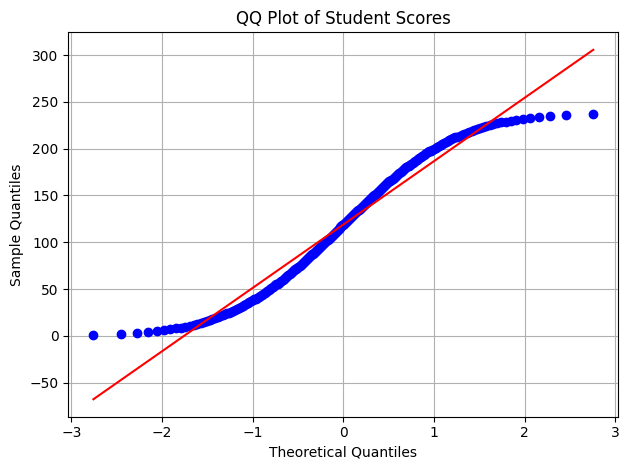

Based on the Shapiro-Wilk test (p-value ≤ 0.05), the data significantly differs from a normal distribution.
Skew and kurtosis may also indicate asymmetry or heavy tails.
The QQ plot likely shows deviation from the reference line.
Therefore, we conclude that the student scores do not follow a normal distribution.


In [15]:
# QQ Plot
probplot(scores, dist="norm", plot=plt)
plt.title("QQ Plot of Student Scores")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.grid(True)
plt.tight_layout()
plt.show()

if shapiro_test.pvalue > 0.05:
    print("Based on the Shapiro-Wilk test (p-value > 0.05), the data does not significantly differ from a normal distribution.")
    print("The skew and kurtosis values further support that the data is approximately symmetric and not heavily tailed.")
    print("The QQ plot visually shows points close to the reference line, indicating normality.")
    print("Therefore, we conclude that the student scores appear to follow a normal distribution.")
else:
    print("Based on the Shapiro-Wilk test (p-value ≤ 0.05), the data significantly differs from a normal distribution.")
    print("Skew and kurtosis may also indicate asymmetry or heavy tails.")
    print("The QQ plot likely shows deviation from the reference line.")
    print("Therefore, we conclude that the student scores do not follow a normal distribution.")
